# Introduction

### This file is about the machine learning process of the dataset "device_failure.csv". It includes below sections-
### 1.Data Exploration
### 2.Decision Tree Model
### 3.Deal with imbanlanced data
### 4.Conclusion

# Part 1: Data Exploration

In [51]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
#read csv file
data=pd.read_csv('device_failure.csv',encoding = "ISO-8859-1")

In [53]:
#check datashape
print(data.shape)

(124494, 12)


In [54]:
#get the overview of data columns
def get_column_types(dataframe):
    numeric_cols = dataframe.select_dtypes([np.number,np.float64]).columns.values
    cat_cols = dataframe.select_dtypes([np.object]).columns.values
    date_cols = dataframe.select_dtypes([np.datetime64]).columns.values
    print("In total there's %d columns" % dataframe.shape[1] )
    print('These %d columns are numeric: %s'% (len(numeric_cols),numeric_cols))
    print('These %d columns are catgorical: %s'% (len(cat_cols),cat_cols))
    print('These %d columns are timestampe: %s'% (len(date_cols),date_cols))
    return numeric_cols,cat_cols,date_cols

num_cols,cat_cols,date_cols = get_column_types(data)

In total there's 12 columns
These 10 columns are numeric: ['failure' 'attribute1' 'attribute2' 'attribute3' 'attribute4'
 'attribute5' 'attribute6' 'attribute7' 'attribute8' 'attribute9']
These 2 columns are catgorical: ['date' 'device']
These 0 columns are timestampe: []


In [4]:
#change "failure" to category, "date" to datetime

In [5]:
data['failure']=data['failure'].astype('category')
data['date'] = pd.to_datetime(data['date'],format='%Y-%m-%d')

In [6]:
#double check the datatype
data.dtypes

date          datetime64[ns]
device                object
failure             category
attribute1             int64
attribute2             int64
attribute3             int64
attribute4             int64
attribute5             int64
attribute6             int64
attribute7             int64
attribute8             int64
attribute9             int64
dtype: object

In [7]:
#overview of data values
data.describe(include="all")

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494,124494,124494.0,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
unique,304,1169,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-01-03 00:00:00,S1F0FP0C,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1163,304,124388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2015-11-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.223881e+08,159.484762,9.940455,1.741120,14.222669,260172.657726,0.292528,0.292528,12.451524
std,NaN,NaN,NaN,7.045933e+07,2179.657730,185.747321,22.908507,15.943028,99151.078547,7.436924,7.436924,191.425623
min,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000


In [8]:
#check if there is any missing value in the data

In [9]:
data.isnull().T.any().T.sum()

0

There is no missing value in the dataset. Let's check the attribution of target variable.

0    124388
1       106
Name: failure, dtype: int64

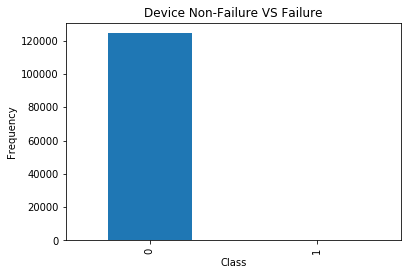

In [57]:
data['failure'].value_counts()
pd.value_counts(data['failure']).plot.bar()
plt.title('Device Non-Failure VS Failure')
plt.xlabel('Class')
plt.ylabel('Frequency')
data['failure'].value_counts()

The data is imbalanced, let's see if there are any common attributes of the failure devices

/Users/zhumary/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


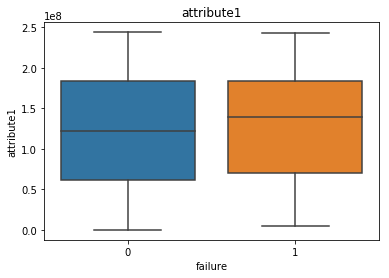

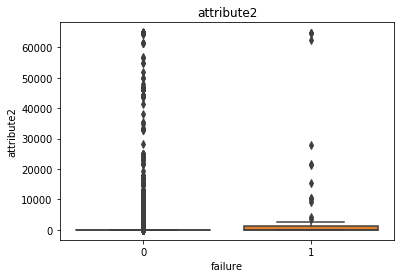

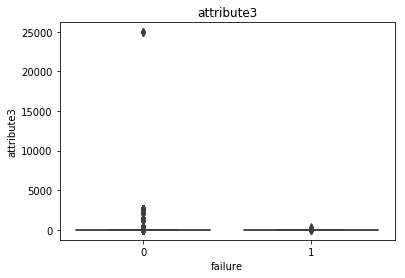

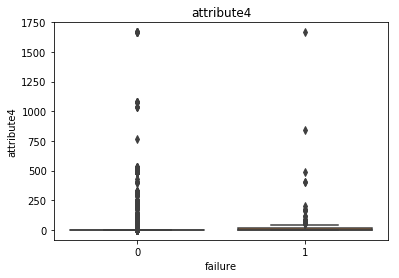

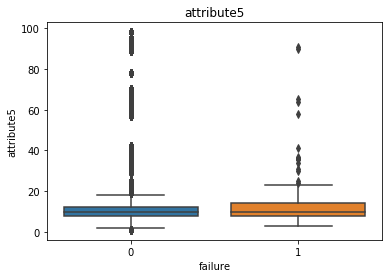

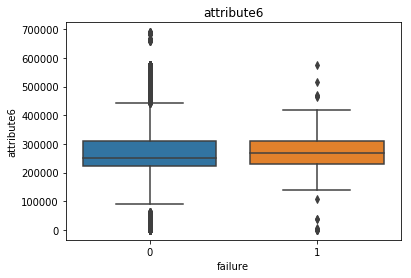

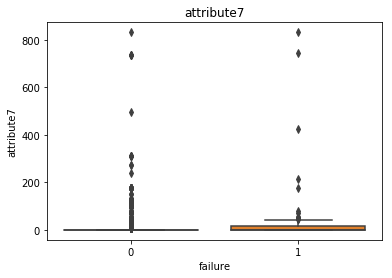

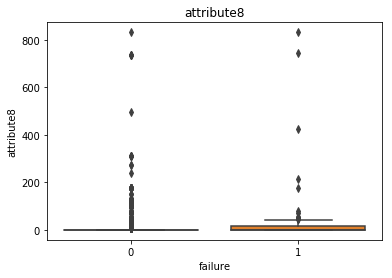

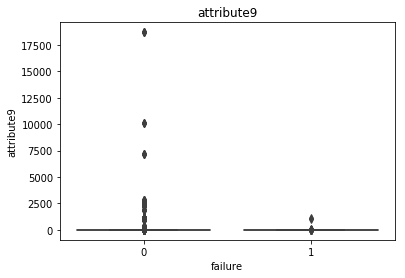

In [11]:
for i in data.columns[3:]:
    plt.figure()
    sns.boxplot(x="failure", y=i, data=data).set_title(i)

From above boxplot, the value of attributes 2,3,4,5,6,9 in "failure device" are slighhly smaller than the those attributes in non-failure devices. 
We can pay more attention to those attributes when buidling models.

## Part2: Start with Decision Tree Model

#### Decision Tree model is commonly used in the classification, especially in the imbalanced problem. It is also easy to explain in the business perspective.

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [13]:
X = data.drop(['date', 'failure'], axis=1)
X = pd.get_dummies(X, columns = ["device"])
Y = data['failure'] 

In [14]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.33, random_state=42)

In [15]:
clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [16]:
accuracy_score(y_test,y_pred)

0.9991724272222763

Accuracy score is high. Model looks great. Let us look at the confusion matrix.

In [17]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = ['0 - success', '1 - failure']

Confusion matrix, without normalization
[[41050     3]
 [   31     0]]
Normalized confusion matrix
[[9.9993e-01 7.3076e-05]
 [1.0000e+00 0.0000e+00]]


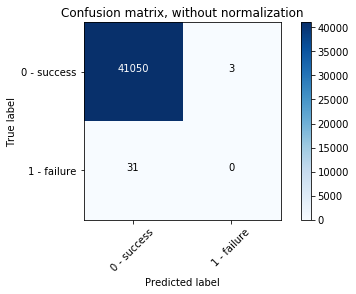

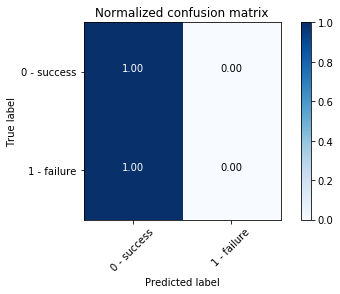

In [18]:
# Comput Confusion Matrix
clf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(clf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(clf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

From the confusion matrix, we can see that TP is high but TF is very low. 
The model is not good at predicting the "device failure".
The main reason is the imbalanced data. Let's try to deal with this issues.

# Part3: Deal with Imbalanced Data

### SMOTE- over sampling in data preprocessing

In [19]:
from imblearn.over_sampling import SMOTE

In [27]:
sm = SMOTE(random_state=2)
X_resampled_train, y_resampled_train = sm.fit_sample(X_train, y_train.values.ravel())

In [28]:
attributelist=list(X_train.columns.values)

In [29]:
# Convert to dataframe
X_resampled_train=pd.DataFrame(X_resampled_train,columns=attributelist)
y_resampled_train=pd.DataFrame(y_resampled_train,columns=['failure'])

In [30]:
#rerun the decision tree model

In [31]:
clf_smote = DecisionTreeClassifier(max_depth = 5)
clf_smote.fit(X_resampled_train,y_resampled_train)
y_pred_oversample=clf_smote.predict(X_test)

In [32]:
accuracy_score(y_test,y_pred_oversample)

0.9462077694479603

Confusion matrix, without normalization
[[38855  2198]
 [   12    19]]
Normalized confusion matrix
[[0.9465 0.0535]
 [0.3871 0.6129]]


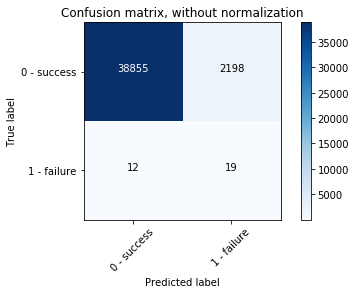

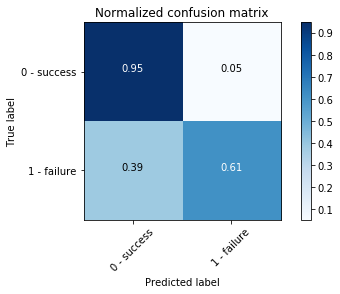

In [33]:
# Comput Confusion Matrix
clf_matrix = confusion_matrix(y_test, y_pred_oversample)
np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(clf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(clf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

From the confusion matrix above, we can see that the TN has been increased. The accuracy is 94%.
SMOTE algorithm has improved model performance.

Can we do better? I thought of Ensemble which can improve the performance of singler classifiers. Random Forest is one of the mose popular one. I can start with this first.

### Apply Ensemble Algorithm

#### Random Forest

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=100)

#Train the model
rfc.fit(X_resampled_train,y_resampled_train.values.ravel())

y_pred_rfc=rfc.predict(X_test)

In [35]:
accuracy_score(y_test,y_pred_rfc)

0.998856002336676

Confusion matrix, without normalization
[[41030    23]
 [   24     7]]
Normalized confusion matrix
[[9.9944e-01 5.6025e-04]
 [7.7419e-01 2.2581e-01]]


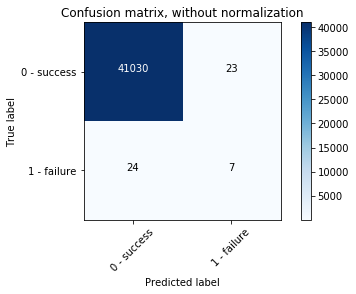

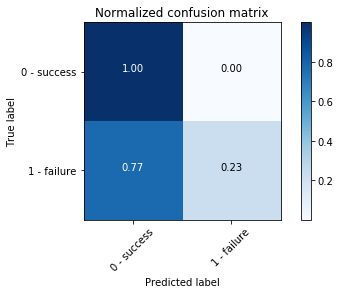

In [36]:
# Comput Confusion Matrix
rfc_matrix = confusion_matrix(y_test, y_pred_rfc)
np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(rfc_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(rfc_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Randome Forest is not good as Decision Tree in the prediction of "Device Failure". 
After some online searching, I found that XGBoost is more efficient and consider the weak leaner in the classification. So let's try XGBoost this time.

#### XGBoost

In [37]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_resampled_train,y_resampled_train.values.ravel())
y_pred_xgb=rfc.predict(X_test)

In [47]:
accuracy_score(y_test,y_pred_xgb)

0.9624428001168338

Confusion matrix, without normalization
[[39521  1532]
 [   11    20]]
Normalized confusion matrix
[[0.9627 0.0373]
 [0.3548 0.6452]]


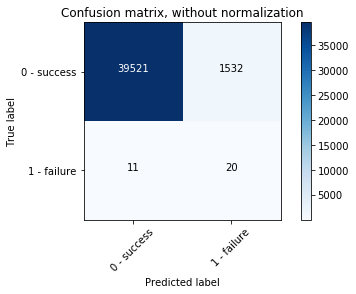

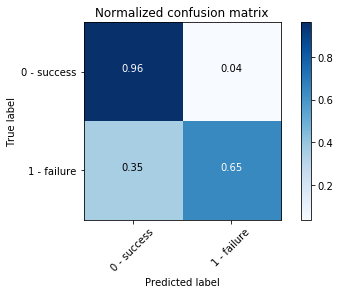

In [49]:
# Comput Confusion Matrix
xgb_matrix = confusion_matrix(y_test, y_pred_xgb)
np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(xgb_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(xgb_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

XGBoost has the highest TN among all those models, which is very important for the prediction of device failure.

## Part4 Conclusion

#### 1. Based off the above model training, I will use the combination of SMOTE and XGB boost in the furture predictive model
#### 2. There are some improvements we can consider in next step:
        a. Check the featrue importance and drop the nonsignificant feature from model
        b. Use GridSearch to find the best combination of parameters in the model
        c. Try other over-sampling approaches and see if it will improve the model performance
        d. Use the CrossValidation to avoid the model overfitting